In [79]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from numbers import Number
from typing import Any, List
import graphviz

# Code

In [80]:
def ID_Generator():
    """Generator of IDs used as vertex IDs inside a graph class.

    The generator produces a sequence of consecutive non-negative integers,
    starting from zero.

    """
    num = 0
    while True:
        yield num
        num += 1


class Vertex:
    """Class representing a vertex in a graph.

    Attributes:
        value (Any): The value associated with the vertex.
        ID (int): The unique identifier of the vertex.
        edges (List[Edge]): The list of edges connected to the vertex.

    Methods:
        __init__(value: Any, ID: int) -> None:
            Initializes a vertex with the given value and ID.

        get_value() -> Any:
            Returns the value associated with the vertex.

        get_ID() -> int:
            Returns the unique identifier of the vertex.

        get_edges() -> List[Edge]:
            Returns the list of edges connected to the vertex.

        add_edge(edge: Edge) -> None:
            Adds the given edge to the list of edges connected to the vertex.
    """

    def __init__(self, value: Any, ID: int) -> None:
        """Initializes a vertex with the given value and ID.

        Args:
            value: The value associated with the vertex.
            ID: The unique identifier of the vertex.
        """
        self.value = value
        self.edges = []
        self.ID = ID

    def get_value(self) -> Any:
        """Returns the value associated with the vertex.

        Returns:
            The value associated with the vertex.
        """
        return self.value

    def get_ID(self) -> int:
        """Returns the unique identifier of the vertex.

        Returns:
            The unique identifier of the vertex.
        """
        return self.ID

    def get_edges(self) -> List['Edge']:
        """Returns the list of edges connected to the vertex.

        Returns:
            The list of edges connected to the vertex.
        """
        return self.edges

    def add_edge(self, edge: 'Edge') -> None:
        """Adds the given edge to the list of edges connected to the vertex.

        Args:
            edge: The edge to add.
        """
        self.edges.append(edge)


class Edge:
    """Class representing an edge in a graph.

    Attributes:
        startpoint (Vertex): The vertex at the start of the edge.
        endpoint (Vertex): The vertex at the end of the edge.
        weight (Number): The weight of the edge (default: 1).

    Methods:
        __init__(startpoint: Vertex, endpoint: Vertex, weight: Number = 1) -> None:
            Initializes an edge with the given startpoint, endpoint, and weight.

        get_endpoint() -> Vertex:
            Returns the vertex at the end of the edge.

        get_IDs() -> List[int]:
            Returns the IDs of the startpoint and endpoint vertices.

        get_values() -> List[Any]:
            Returns the values of the startpoint and endpoint vertices.

        get_weight() -> Number:
            Returns the weight of the edge.
    """

    def __init__(self, startpoint: Vertex, endpoint: Vertex, weight: Number = 1) -> None:
        """Initializes an edge with the given startpoint, endpoint, and weight.

        Args:
            startpoint: The vertex at the start of the edge.
            endpoint: The vertex at the end of the edge.
            weight: The weight of the edge (default: 1).
        """
        self.startpoint = startpoint
        self.endpoint = endpoint
        self.weight = weight

    def get_endpoint(self) -> Vertex:
        """Returns the vertex at the end of the edge.

        Returns:
            The vertex at the end of the edge.
        """
        return self.endpoint

    def get_IDs(self) -> List[int]:
        """Returns the IDs of the startpoint and endpoint vertices.

        Returns:
            A list containing the IDs of the startpoint and endpoint vertices.
        """
        return [self.startpoint.get_ID(), self.endpoint.get_ID()]

    def get_values(self) -> List[Any]:
        """Returns the values of the startpoint and endpoint vertices.

        Returns:
            A list containing the values of the startpoint and endpoint vertices.
        """
        return [self.startpoint.get_value(), self.endpoint.get_value()]

    def get_weight(self) -> Number:
        """Returns the weight of the edge.

        Returns:
            The weight of the edge.
        """
        return self.weight


class Graph:
    """
    A class representing a graph.

    Attributes:
    vertices (list): A list of vertices in the graph.
    edges (list): A list of edges in the graph.
    edges_by_id (dict): A dictionary of edges indexed by their ID.
    ID_gen (ID_Generator): An instance of ID_Generator class used to generate IDs.
    name_id_dict (dict): A dictionary of vertex names indexed by their ID.
    id_vertex_dict (dict): A dictionary of vertices indexed by their ID.

    Methods:
    addVertex(vert: str) -> None:
        Adds a vertex to the graph.

    addVerticesFromList(vertex_list: list) -> None:
        Adds a list of vertices to the graph.
    
    get_vertexs_values() -> list:
        Returns a list of vertex values in the graph.
        
    get_vertex_id(self) -> List:
        Returns a list of IDs of all vertices in the graph.
        
    get_id_names_maping() -> dict:
        Returns a dictionary that maps values to their IDs.

    addEdgesFromList(edgeList: list) -> None:
        Adds a list of edges to the graph.

    getVertices() -> list:
        Returns a list of vertices in the graph.
    
    getEdges() -> list:
        Returns a list of edges in the graph.
    
    getNeighbors(vertKey: str|list[str,int]|Vertex) -> list:
        Returns a list of vertices connected to a vertex.

    saveGraph(graph: Graph, name:str = "graph.dot") -> None:
        Saves the graph as a DOT file with the given name.
    
    getShortestPaths(self, fromVert: str|list[str,int]):
        Finds the shortest paths from a vertex to all other vertices in the graph using Dijkstra's algorithm.
    
            
    __contains__(vertKey: str | list[str, int] | Vertex) -> bool:
        Returns True if a vertex exists in the graph, False otherwise.
    
    __str__(self):
        Returns a string representation of the graph.
        
    """
    
    def __init__(self) -> None:
        self.vertices = []
        self.edges = []
        self.edges_by_id = {}
        self.ID_gen = ID_Generator()
        self.name_id_dict = {}
        self.id_vertex_dict = {}

    def addVertex(self, vert: str) -> None:
        Vert = Vertex(vert, next(self.ID_gen))
        if vert in self.name_id_dict:
            self.name_id_dict[Vert.get_value()].append(Vert.get_ID())
            warnings.warn(f"There are {len(self.name_id_dict[Vert.get_value()])} vertex with the same value:{Vert.get_value()} in the graph.", Warning)
        else:
            self.name_id_dict[Vert.get_value()] = [Vert.get_ID()]
        self.id_vertex_dict[Vert.get_ID()] = Vert
        self.vertices.append(Vert)

    def addVerticesFromList(self, vertex_list: list):
        for vert in vertex_list:
            self.addVertex(vert)

    
    def get_vertexs_values(self):
        return [verex.get_value() for verex in self.vertices]

    def get_vertex_id(self):
        return [vert.get_ID() for vert in self.vertices]
    
    def get_id_names_maping(self):
        end_name_id_map = {}
        name_id_dict = self.name_id_dict
        for id in name_id_dict:
            if len(name_id_dict[id]) == 1:
                end_name_id_map[name_id_dict[id][0]] = id
            else:
                for j, _ in enumerate(name_id_dict[id]):
                    end_name_id_map[name_id_dict[id][j]] = [id, j]
        return end_name_id_map
    
    def addEdge(self, fromVert: str | list[str, int], toVert: str | list[str, int], weight: Number = 1):
        if type(fromVert) is list:
            name, order = fromVert
            fromVert_id = self.name_id_dict[name][order]
        elif fromVert in self.name_id_dict:
            if len(self.name_id_dict[fromVert]) == 1:
                fromVert_id = self.name_id_dict[fromVert][0]
            else:
                raise ValueError(f"There are {len(self.name_id_dict[fromVert])} vertices in the graph named '{fromVert}', please use as argument fromVert = ['{fromVert}', order].")
        else:
            self.addVertex(fromVert)
            fromVert_id = self.name_id_dict[fromVert][-1]

        if type(toVert) is list:
            name, order = toVert
            toVert_id = self.name_id_dict[name][order]
        elif toVert in self.name_id_dict:
            if len(self.name_id_dict[toVert]) == 1:
                toVert_id = self.name_id_dict[toVert][0]
            else:
                raise ValueError(f"There are {len(self.name_id_dict[toVert])} vertices in the graph named '{toVert}', please use as argument toVert = ['{toVert}', order].")
        else:
            self.addVertex(toVert)
            toVert_id = self.name_id_dict[toVert][-1]

        if (fromVert_id, toVert_id) in self.edges_by_id or (toVert_id, fromVert_id) in self.edges_by_id:
            warnings.warn("You are trying to add an existing edge.", Warning)
            if self.edges_by_id[(fromVert_id, toVert_id)].get_weight() != weight:
                self.edges_by_id[(fromVert_id, toVert_id)].weight = weight
                self.edges_by_id[(toVert_id, fromVert_id)].weight = weight
                warnings.warn("You updat the weight value of edge [fromVert, toVert].", Warning)

        else:

            fromVertex = self.id_vertex_dict[fromVert_id]
            toVertex = self.id_vertex_dict[toVert_id]
            edge1 = Edge(fromVertex, toVertex, weight)
            edge2 = Edge(toVertex, fromVertex, weight)
            self.edges.extend([edge1, edge2])
            self.edges_by_id[(fromVert_id, toVert_id)] = edge1
            self.edges_by_id[(toVert_id, fromVert_id)] = edge2

            fromVertex.add_edge(edge1)
            toVertex.add_edge(edge2)
            
    def addEdgesFromList(self, edgeList: list):
        for edge in edgeList:
            self.addEdge(*edge)
    
    def getVertices(self):
        return self.vertices

    def getEdges(self):
            return self.edges
    
    def getNeighbors(self, vertKey: str | list[str, int] | Vertex):
        if type(vertKey) is Vertex:
            return vertKey.edges
        elif type(vertKey) is list:
            name, order = vertKey
            Vert_id = self.name_id_dict[name][order]
            return [edge.get_endpoint() for edge in self.id_vertex_dict[Vert_id].edges]
        else:
            if len(self.name_id_dict[vertKey]) == 1:
                Vert_id = self.name_id_dict[vertKey][0]
                return [edge.get_endpoint() for edge in self.id_vertex_dict[Vert_id].edges]
            else:
                raise ValueError(f"There are {len(self.name_id_dict[Vert_id])} vertices in the graph named '{vertKey}', please use as argument vertKey = ['{vertKey}', order].")
    
    def __contains__(self, vertKey: str | list[str, int] | Vertex):
        if type(vertKey) is Vertex:
            return vertKey in self.vertices

        elif type(vertKey) is list:
            name, order = vertKey
            try:
                id = self.name_id_dict[name][order]
                if self.id_vertex_dict[id]: return True
            except:
                return False
        else:
            if vertKey in self.name_id_dict:
                if len(self.name_id_dict[vertKey]) == 1:
                    Vert_id = self.name_id_dict[vertKey][0]
                    return self.id_vertex_dict[Vert_id].edges
                else:
                    raise ValueError(f"There are {len(self.name_id_dict[vertKey])} vertices in the graph named '{vertKey}', please use as argument vertKey = ['{vertKey}', order].")

    @staticmethod
    def saveGraph(graph: 'Graph', name:str = "graph.dot") -> None: 
        with open(name,"w") as file:
            file.write(str(graph))
    
    def __str__(self):
        """Returns a string representation of the graph.

        Returns:
            A string representing the graph in the DOT language format, which can be used to visualize the graph.
        """
        end_name_id_map = self.get_id_names_maping()
        notes_id = self.get_vertex_id()
        notes_names = [end_name_id_map[id] for id in notes_id]
        dot = ""
        edges_ids = {}
        edges_by_id = g.edges_by_id
        for ids in edges_by_id:
            if not (ids in edges_ids or ids[::-1] in edges_ids):
                edges_ids[ids] = {"weight":edges_by_id[ids].get_weight()}
        
        dot+="graph G {\n"
        for name in notes_names:
            dot+=f'   "{name}";\n'
        for edge_ids in edges_ids:
                dot+=f'   "{end_name_id_map[edge_ids[0]]}" -- "{end_name_id_map[edge_ids[1]]}" [ label = "{edges_ids[edge_ids]["weight"]}" ];\n'
        dot+="}"
        return dot
    
    def getShortestPaths(self, fromVert: str|list[str,int]) -> dict['id':dict['vertex':str,'id_path':list,'weight':Number]]:
        """Finds the shortest paths from a vertex to all other vertices in the graph using Dijkstra's algorithm.
        Args:
            - fromVert: str or list[str,int] - Name of the starting vertex.

        Returns:
            - dict: A dictionary containing the shortest path information. The keys are the vertex IDs, and the values are dictionaries with the following keys:
            - vertex: str - The name of the vertex.
            - id_path: list[int] - The IDs of the vertices in the shortest path.
            - weight: Number - The total weight of the shortest path.
        """
        end_name_id_map = self.get_id_names_maping()
        x = [id for id in end_name_id_map if fromVert == end_name_id_map[id]][0]
        id_vertex_dict = self.id_vertex_dict
        Q = [id for id in id_vertex_dict]
        info = {id:{"vertex": end_name_id_map[id],
                    "id_path": [],
                    "weight": np.inf
                    }
                for id in id_vertex_dict}
        info[x]["id_path"].append(x)
        info[x]["weight"] = 0
        while True:
            Q.sort(key= lambda id: info[id]["weight"])
            act = Q.pop(0)
            if len(Q) == 0:
                break
            vert = id_vertex_dict[act]
            for edge in vert.get_edges():
                edge_end_point_id = edge.get_endpoint().get_ID()
                if edge_end_point_id in Q:
                    edge_weight = edge.get_weight()
                    if edge_weight + info[act]["weight"] < info[edge_end_point_id]["weight"]:
                        info[edge_end_point_id]["weight"] = edge_weight + info[act]["weight"]
                        info[edge_end_point_id]["id_path"] = info[act]["id_path"] + [edge_end_point_id]    
        return info

# testy

In [81]:
with open("test.dot","w") as f:
    f.write(str(g))

In [82]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
print("Value", g.get_vertexs_values())
g.get_id_names_maping()

Value ['A', 'B', 'C']


{0: 'A', 1: 'B', 2: 'C'}

In [83]:
g = Graph()
g.addVertex("A")
g.addVertex("A")
g.addVertex("C")
for id, value in zip(g.get_vertex_id(), g.get_vertexs_values()):
    print(f"ID: {id}, value: {value}")
g.get_id_names_maping() #Duplicate values are represented as a tuple ["Value", "order"]

ID: 0, value: A
ID: 1, value: A
ID: 2, value: C


/tmp/ipykernel_142196/17606473.py:220: Warning: There are 2 vertex with the same value:A in the graph.
  warnings.warn(f"There are {len(self.name_id_dict[Vert.get_value()])} vertex with the same value:{Vert.get_value()} in the graph.", Warning)


{0: ['A', 0], 1: ['A', 1], 2: 'C'}

In [84]:
g = Graph()
g.addVerticesFromList(["A","B","C"])
for id, value in zip(g.get_vertex_id(), g.get_vertexs_values()):
    print(f"ID: {id}, value: {value}")
g.get_id_names_maping() #Duplicate values are represented as a tuple ["Value", "order"]

ID: 0, value: A
ID: 1, value: B
ID: 2, value: C


{0: 'A', 1: 'B', 2: 'C'}

In [85]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdge("A","B")
g.addEdge("B","C")
g.addEdge("C","A")

print("Value", g.get_vertexs_values())
g.edges_by_id

Value ['A', 'B', 'C']


{(0, 1): <__main__.Edge at 0x7f47a26dbc10>,
 (1, 0): <__main__.Edge at 0x7f47a26dbf50>,
 (1, 2): <__main__.Edge at 0x7f47a26d8250>,
 (2, 1): <__main__.Edge at 0x7f47a26db290>,
 (2, 0): <__main__.Edge at 0x7f47a26d95d0>,
 (0, 2): <__main__.Edge at 0x7f47a26db950>}

In [86]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdge("A","B")
g.addEdge("B","C")
g.addEdge("C","A",1)
g.addEdge("C","A",2)

print("Value", g.get_vertexs_values())
g.edges_by_id

Value ['A', 'B', 'C']


/tmp/ipykernel_142196/17606473.py:274: Warning: You are trying to add an existing edge.
  warnings.warn("You are trying to add an existing edge.", Warning)
/tmp/ipykernel_142196/17606473.py:278: Warning: You updat the weight value of edge [fromVert, toVert].
  warnings.warn("You updat the weight value of edge [fromVert, toVert].", Warning)


{(0, 1): <__main__.Edge at 0x7f47a26da9d0>,
 (1, 0): <__main__.Edge at 0x7f47a26dafd0>,
 (1, 2): <__main__.Edge at 0x7f47a26d9310>,
 (2, 1): <__main__.Edge at 0x7f47a26d8f90>,
 (2, 0): <__main__.Edge at 0x7f47a26d9ad0>,
 (0, 2): <__main__.Edge at 0x7f47a26d8e10>}

In [87]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdgesFromList([["A","B"],
                    ["B","C"],
                    ["C","A"]])

for id, value in zip(g.get_vertex_id(), g.get_vertexs_values()):
    print(f"ID: {id}, value: {value}")
g.edges_by_id

ID: 0, value: A
ID: 1, value: B
ID: 2, value: C


{(0, 1): <__main__.Edge at 0x7f47a2616790>,
 (1, 0): <__main__.Edge at 0x7f47a26157d0>,
 (1, 2): <__main__.Edge at 0x7f47a26172d0>,
 (2, 1): <__main__.Edge at 0x7f47a2615250>,
 (2, 0): <__main__.Edge at 0x7f47a2616750>,
 (0, 2): <__main__.Edge at 0x7f47a2617610>}

In [88]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdgesFromList([["A","B"],
                    ["B","C"],
                    ["C","A"]])
[[vert.get_value(), vert] for vert in g.getVertices()]

[['A', <__main__.Vertex at 0x7f47a27b8ad0>],
 ['B', <__main__.Vertex at 0x7f47a26da210>],
 ['C', <__main__.Vertex at 0x7f47a26d8150>]]

In [89]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdgesFromList([["A","B"],
                    ["B","C"],
                    ["C","A"]])
[[edge.get_values(),edge] for edge in g.getEdges()]


[[['A', 'B'], <__main__.Edge at 0x7f47a26b2590>],
 [['B', 'A'], <__main__.Edge at 0x7f47a26b3990>],
 [['B', 'C'], <__main__.Edge at 0x7f47a26b1d90>],
 [['C', 'B'], <__main__.Edge at 0x7f47a26b1e10>],
 [['C', 'A'], <__main__.Edge at 0x7f47a26b2110>],
 [['A', 'C'], <__main__.Edge at 0x7f47a26b1a90>]]

In [90]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdgesFromList([["A","B"],
                    ["B","C"],
                    ["C","A"]])
[[vert.get_value(), vert ] for vert in g.getNeighbors("A")]

[['B', <__main__.Vertex at 0x7f47a26b3e90>],
 ['C', <__main__.Vertex at 0x7f47a26b2d90>]]

In [91]:
g = Graph()
g.addVertex("A")
g.addVertex("B")
g.addVertex("C")
g.addEdgesFromList([["A","B"],
                    ["B","C"],
                    ["C","A"]])

"A" in g, "B" in g, "D" in g

(True, True, False)

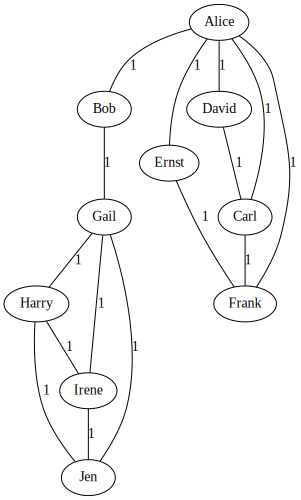

In [92]:
g = Graph()

g.addEdgesFromList([["Alice","Bob"],
                    ["Bob","Gail"],
                    ["Irene","Gail"],
                    ["Carl","Alice"],
                    ["Gail","Harry"],
                    ["Irene","Jen"],
                    ["Alice","David"],
                    ["Harry","Jen"],
                    ["Ernst","Frank"],
                    ["Alice","Ernst"],
                    ["Jen","Gail"],
                    ["David","Carl"],
                    ["Alice","Frank"],
                    ["Harry","Irene"],
                    ["Carl","Frank"]])
Graph.saveGraph(g)
graphviz.Source.from_file("graph.dot")

ID: 0, value: Alice
ID: 1, value: Bob
ID: 2, value: Gail
ID: 3, value: Irene
ID: 4, value: Carl
ID: 5, value: Harry
ID: 6, value: Jen
ID: 7, value: David
ID: 8, value: Ernst
ID: 9, value: Frank


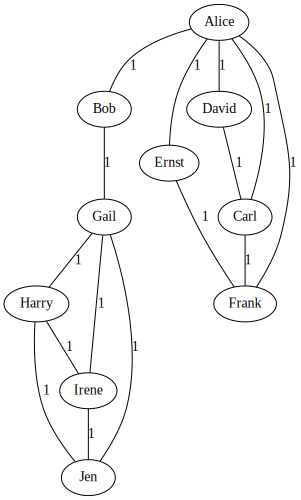

In [93]:
g = Graph()

g.addEdgesFromList([["Alice","Bob"],
                    ["Bob","Gail"],
                    ["Irene","Gail"],
                    ["Carl","Alice"],
                    ["Gail","Harry"],
                    ["Irene","Jen"],
                    ["Alice","David"],
                    ["Harry","Jen"],
                    ["Ernst","Frank"],
                    ["Alice","Ernst"],
                    ["Jen","Gail"],
                    ["David","Carl"],
                    ["Alice","Frank"],
                    ["Harry","Irene"],
                    ["Carl","Frank"]])
for id, value in zip(g.get_vertex_id(), g.get_vertexs_values()):
    print(f"ID: {id}, value: {value}")
graphviz.Source.from_file("graph.dot")

In [94]:
g.getShortestPaths("Alice")

{0: {'vertex': 'Alice', 'id_path': [0], 'weight': 0},
 1: {'vertex': 'Bob', 'id_path': [0, 1], 'weight': 1},
 2: {'vertex': 'Gail', 'id_path': [0, 1, 2], 'weight': 2},
 3: {'vertex': 'Irene', 'id_path': [0, 1, 2, 3], 'weight': 3},
 4: {'vertex': 'Carl', 'id_path': [0, 4], 'weight': 1},
 5: {'vertex': 'Harry', 'id_path': [0, 1, 2, 5], 'weight': 3},
 6: {'vertex': 'Jen', 'id_path': [0, 1, 2, 6], 'weight': 3},
 7: {'vertex': 'David', 'id_path': [0, 7], 'weight': 1},
 8: {'vertex': 'Ernst', 'id_path': [0, 8], 'weight': 1},
 9: {'vertex': 'Frank', 'id_path': [0, 9], 'weight': 1}}

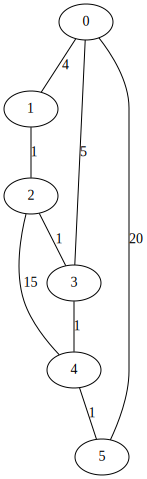

In [95]:

g = Graph()
g.addEdgesFromList([["0","1",4],
                    ["2","3",1],
                    ["3","4",1],
                    ["4","5",1],
                    ["0","3",5],
                    ["0","5",20],
                    ["1","2",1],
                    ["2","4",15]
                    ])
Graph.saveGraph(g, name="graph_2.dot")
graphviz.Source.from_file("graph_2.dot")

In [96]:
g.getShortestPaths("1")

{0: {'vertex': '0', 'id_path': [1, 0], 'weight': 4},
 1: {'vertex': '1', 'id_path': [1], 'weight': 0},
 2: {'vertex': '2', 'id_path': [1, 2], 'weight': 1},
 3: {'vertex': '3', 'id_path': [1, 2, 3], 'weight': 2},
 4: {'vertex': '4', 'id_path': [1, 2, 3, 4], 'weight': 3},
 5: {'vertex': '5', 'id_path': [1, 2, 3, 4, 5], 'weight': 4}}

In [97]:
print(str(g))

graph G {
   "0";
   "1";
   "2";
   "3";
   "4";
   "5";
   "0" -- "1" [ label = "4" ];
   "2" -- "3" [ label = "1" ];
   "3" -- "4" [ label = "1" ];
   "4" -- "5" [ label = "1" ];
   "0" -- "3" [ label = "5" ];
   "0" -- "5" [ label = "20" ];
   "1" -- "2" [ label = "1" ];
   "2" -- "4" [ label = "15" ];
}
